In [22]:
!pip install tensorflow-gpu

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!nvidia-smi

Sun Apr 11 07:50:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |   3932MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
import tensorflow as tf

# **Import the libraries**

In [26]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout,Input, Lambda

from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [27]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.4.1


In [28]:
size = 32
model_name  = 'handwrittern bangla letter32 Dense169.h5'
batch_size = 32
IMAGE_SIZE = [size,size ]
path = '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/'

train_path = path + 'Train'
test_path = path + 'Test'

In [29]:

folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/177',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/175',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/172',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/176',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/180',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/173',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/181',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/174',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/179',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/178',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/186',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/182',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/191',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/190',
 '/content/drive/MyDrive/Datasets/BasicFinalDatabase32/Train/1

In [30]:
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50,pooling='avg') 
model_d=DenseNet169(weights='imagenet',include_top=False, input_shape=(size, size, 3,),classes=50) 
# model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(size, size, 3,)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(len(folders),activation='softmax')(x) #FC-layer

In [31]:
model = Model(inputs=model_d.input, outputs=preds)
# model.summary()

In [32]:
# don't train existing weights
# for layer in model.layers:
#     layer.trainable = False


# for layer in model.layers[:-8]:
#     layer.trainable=False
    
# for layer in model.layers[-8:]:
#     layer.trainable=True

In [33]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint(model_name, verbose=1, save_best_only=True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 12010 images belonging to 50 classes.


In [36]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (size, size),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 3050 images belonging to 50 classes.


In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  callbacks=[anne, checkpoint],
  validation_steps=len(test_set)
)

Epoch 1/100
376/376 [==============================] - 64s 124ms/step - loss: 3.9178 - accuracy: 0.1193 - val_loss: 4.1039 - val_accuracy: 0.2282

Epoch 00001: val_loss improved from inf to 4.10391, saving model to handwrittern bangla letter32 Dense169.h5
Epoch 2/100
376/376 [==============================] - 44s 118ms/step - loss: 2.2804 - accuracy: 0.3927 - val_loss: 42.2026 - val_accuracy: 0.2754

Epoch 00002: val_loss did not improve from 4.10391
Epoch 3/100
376/376 [==============================] - 44s 117ms/step - loss: 1.6805 - accuracy: 0.5380 - val_loss: 4.1200 - val_accuracy: 0.2295

Epoch 00003: val_loss did not improve from 4.10391
Epoch 4/100
376/376 [==============================] - 43s 115ms/step - loss: 1.7846 - accuracy: 0.5085 - val_loss: 2.6600 - val_accuracy: 0.6570

Epoch 00004: val_loss improved from 4.10391 to 2.65995, saving model to handwrittern bangla letter32 Dense169.h5
Epoch 5/100
376/376 [==============================] - 43s 114ms/step - loss: 1.0109 - 

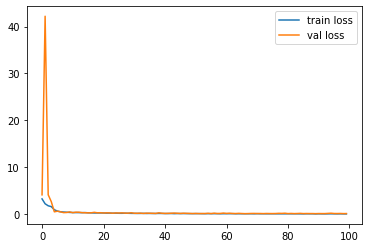

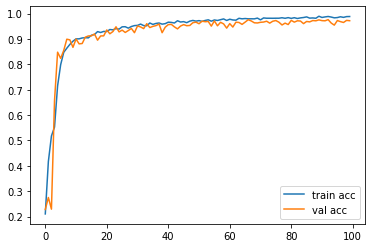

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [39]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(model_name)

In [40]:
y_pred = model.predict(test_set)
y_pred

array([[3.04146823e-08, 3.92380954e-08, 2.01457429e-09, ...,
        1.18960486e-09, 6.61500993e-11, 9.25795204e-11],
       [2.05524202e-07, 9.87852573e-08, 4.30295449e-06, ...,
        9.97858584e-01, 1.32564281e-04, 3.58379417e-04],
       [3.21596508e-06, 1.48004375e-07, 1.05524737e-06, ...,
        3.10675944e-07, 4.50434072e-06, 4.15960385e-05],
       ...,
       [1.94948915e-13, 5.09045750e-10, 2.22249497e-10, ...,
        2.84043649e-13, 3.63041238e-12, 9.15057846e-16],
       [9.86483606e-09, 1.10125846e-07, 3.71330425e-05, ...,
        1.45987826e-07, 1.15676180e-08, 1.75833723e-10],
       [9.13570784e-06, 5.49084461e-06, 4.08814140e-06, ...,
        2.86461109e-05, 1.53706949e-07, 3.92897164e-06]], dtype=float32)

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model(model_name)
new_model = tf.keras.models.load_model(model_name)

# Check its architecture
new_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [42]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))
print('Restored model, loss: {:5.2f}%'.format(100 * loss))


96/96 - 6s - loss: 0.1134 - accuracy: 0.9718
Restored model, accuracy: 97.18%
Restored model, loss: 11.34%
